# Hypergraph information

In [1]:
import sys

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb
from tqdm import tqdm

sys.path.append("../src/")

import xgi
from reducibility_hg import *

sb.set_theme(style="ticks", context="paper")


In [2]:
results_dir = "../results/"
out_dir  = f"{results_dir}synthetic/"

In [3]:
def plot_3panels(info_losses, complexities, orders, labels, legend_title=None):
    
    
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(7, 2.1), constrained_layout=True, sharey=True)

    n = len(info_losses)
    
    for i in range(n):
        ax1.plot(orders[i], info_losses[i], "o-", label=labels[i], ms=7, mfc="w", lw=2)      

    ax1.set_title("Information Loss (KL)")
    ax1.set_xlabel("Max Order")
    ax1.set_ylabel("Bits")
    
    for i in range(n):
        ax2.plot(orders[i], complexities[i], "o-", label=labels[i], ms=7, mfc="w", lw=2)      

    ax2.set_title("Model Complexity ($\delta S$)")
    ax2.set_xlabel("Max Order")
    
    for i in range(n):
        message_length = complexities[i] + info_losses[i]
        ax3.plot(orders[i], message_length, "o-", label=labels[i], ms=7, mfc="w", lw=2)

    ax3.legend(title=legend_title, bbox_to_anchor=(1, 0.5), frameon=False, loc="center left")

    ax3.set_title("Message Length")
    ax3.set_xlabel("Max Order")

    sb.despine()

    #fig.suptitle(f"Complete hypergraph N={N}")

    #fig_name = f"message_length_complete_hypergraph_N{N}" #lambda2_HG_SC_N_{N}_ps_{ps}_nrep_{n_repetitions}"

    #plt.savefig(f"{out_dir}{fig_name}.png", dpi=250, bbox_inches="tight")
    
    return fig, (ax1, ax2, ax3)

# Complete Hypergraph up to order 2

In [4]:
N = 50
rescale = True

H0 = xgi.complete_hypergraph(N, max_order=2)

orders = np.array(xgi.unique_edge_sizes(H0)) - 1
weights = np.ones(len(orders))

In [5]:
tau_c = find_charact_tau(H0, orders, weights, rescale_per_node=rescale)
tau_c

0.48999999999999916

In [6]:
Ds_H, lZs_H, orders = compute_information(H0, tau_c, rescale_per_node=rescale)

In [7]:
H3 = xgi.complete_hypergraph(N, max_order=3)
Ds_H3, lZs_H3, orders3 = compute_information(H3, tau_c, rescale_per_node=rescale)

H4 = xgi.complete_hypergraph(N, max_order=4)
Ds_H4, lZs_H4, orders4 = compute_information(H4, tau_c, rescale_per_node=rescale)

KeyboardInterrupt: 

In [ ]:
info_losses = [Ds_H, Ds_H3, Ds_H4]
complexities = [lZs_H, lZs_H3, lZs_H4]
orders_arr = [orders, orders3, orders4]
labels = ["2", "3", "4"]

plot_3panels(info_losses, complexities, orders_arr, labels, legend_title="max order")

plt.show()

## Random SC: vary density

In [13]:
N = 50
rescale = True
ps = np.arange(0.1, 1., 0.2)
print(ps)

Hs = []
for p in tqdm(ps):
    H = xgi.random_flag_complex(N, p, max_order=2)
    Hs.append(H)

orders = np.array(xgi.unique_edge_sizes(Hs[0])) - 1
weights = np.ones(len(orders))

[0.1 0.3 0.5 0.7 0.9]


 60%|████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                  | 3/5 [00:24<00:16,  8.11s/it]


KeyboardInterrupt: 

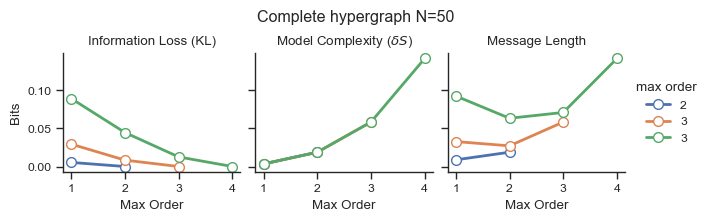

In [29]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(7, 2.1), constrained_layout=True, sharey=True)


ax1.plot(orders, Ds_H, "o-", label=f"2", ms=7, mfc="w", lw=2)    
ax1.plot(orders3, Ds_H3, "o-", label=f"3", ms=7, mfc="w", lw=2)    
ax1.plot(orders4, Ds_H4, "o-", label=f"3", ms=7, mfc="w", lw=2)    

ax1.set_title("Information Loss (KL)")
ax1.set_xlabel("Max Order")
ax1.set_ylabel("Bits")

ax2.plot(orders, lZs_H, "o-", ms=7, mfc="w", lw=2)
ax2.plot(orders3, lZs_H3, "o-", ms=7, mfc="w", lw=2)
ax2.plot(orders4, lZs_H4, "o-", ms=7, mfc="w", lw=2)

ax2.set_title("Model Complexity ($\delta S$)")
ax2.set_xlabel("Max Order")

Q = Ds_H + lZs_H
ax3.plot(orders, Q, "o-", label=f"2", ms=7, mfc="w", lw=2)
Q3 = Ds_H3 + lZs_H3
ax3.plot(orders3, Q3, "o-", label=f"3", ms=7, mfc="w", lw=2)
Q4 = Ds_H4 + lZs_H4
ax3.plot(orders4, Q4, "o-", label=f"3", ms=7, mfc="w", lw=2)
ax3.legend(title="max order", bbox_to_anchor=(1, 0.5), frameon=False, loc="center left")

ax3.set_title("Message Length")
ax3.set_xlabel("Max Order")

sb.despine()

fig.suptitle(f"Complete hypergraph N={N}")

fig_name = f"message_length_complete_hypergraph_N{N}" #lambda2_HG_SC_N_{N}_ps_{ps}_nrep_{n_repetitions}"

#plt.savefig(f"{out_dir}{fig_name}.png", dpi=250, bbox_inches="tight")

## Generate random structure

In [68]:
N = 50
ps = 3 * np.array([1/N, 1/N**2, 1/N**3, 1/N**4])

#H0 = xgi.random_simplicial_complex(N, ps, seed=42)

p = 0.1
H0 = xgi.random_flag_complex(N, p)

print(H0)

orders = np.array(xgi.unique_edge_sizes(H0)) - 1
weights = np.ones(len(orders))

Unnamed SimplicialComplex with 50 nodes and 149 simplices


In [69]:
orders

array([1, 2])

<Axes: >

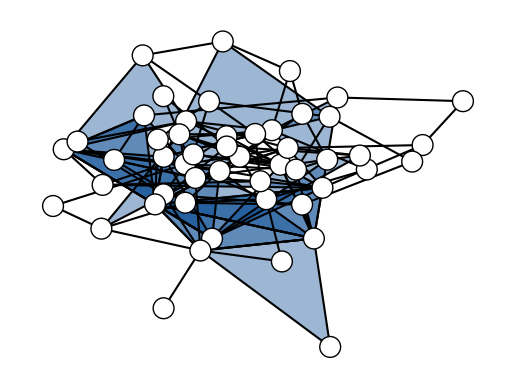

In [70]:
xgi.draw(H0)

## Compute Laplacian and tau_c

In [71]:
L_multi = xgi.multiorder_laplacian(
    H0, orders, weights, rescale_per_node=False, sparse=False
)

In [72]:
L_multi.shape

(50, 50)

In [73]:
tau_c = find_charact_tau(H0, orders, weights, sparse=False)

In [74]:
tau_c

0.04828377751092019

In [75]:
Ds_H, lZs_H, orders = compute_information(H0, tau_c, sparse=False)

In [76]:
Ds_H, lZs_H

(array([0.01080481, 0.        ]), array([0.00047041, 0.01403743]))

## Shuffle single order

In [77]:
#np.savez(f"{out_dir}{fig_name}.npz", Q=Q, Ds_H=Ds_H, lZs_H=lZs_H, orders=orders)

In [78]:
d_shuffles = range(1, xgi.max_edge_order(H0) + 1) #[1, 2, 3, 4] # orders to shuffle
p_shuffle = 1 # probability of shuffling

Hs = []

# create copies of the hypergraph with edges shuffled
for d_shuffle in d_shuffles:
    if d_shuffle <= xgi.max_edge_order(H0):
        print(d_shuffle)
        Hs.append(shuffle_hyperedges(S=H0, order=d_shuffle, p=p_shuffle))

1
2


In [79]:
# compute message length
Ds_H = []
lZs_H = []
Qs_H = []

for H in tqdm([H0] + Hs):
    
    Ds_H_i, lZs_H_i, orders = compute_information(H, tau_c, rescale_per_node=False)
    Q_i = Ds_H_i + lZs_H_i
    
    Ds_H.append(Ds_H_i)
    lZs_H.append(lZs_H_i)
    Qs_H.append(Q_i)

100%|█████████████████████████████████████████████| 3/3 [00:00<00:00, 33.77it/s]


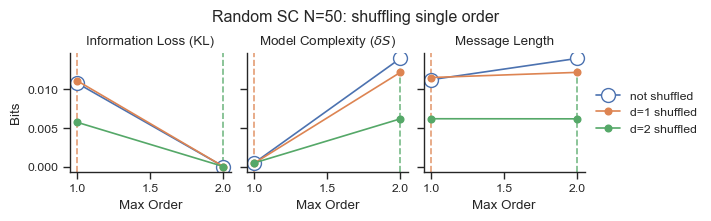

In [80]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(7, 2.1), constrained_layout=True, sharey=True)


#ax1.plot(orders, Ds_H, "o-", ms=7, mfc="w", lw=2)

ax1.plot(orders, Ds_H[0], "o-", label=f"not shuffled", ms=10, mfc="white")    
#ax1.axvline(d_shuffles[0], ls="--", c=f"C0", zorder=-2, alpha=0.8)
for j, H in enumerate(Hs):
    ax1.plot(orders, Ds_H[j+1], "o-", label=f"d={d_shuffles[j]} shuffled")
    ax1.axvline(d_shuffles[j], ls="--", c=f"C{j+1}", zorder=-2, alpha=0.8)

ax1.set_title("Information Loss (KL)")
ax1.set_xlabel("Max Order")
ax1.set_ylabel("Bits")

#ax2.plot(orders, lZs_H, "o-", ms=7, mfc="w", lw=2)

ax2.plot(orders, lZs_H[0], "o-", label=f"not shuffled", ms=10, mfc="white")    
#ax1.axvline(d_shuffles[0], ls="--", c=f"C0", zorder=-2, alpha=0.8)
for j, H in enumerate(Hs):
    ax2.plot(orders, lZs_H[j+1], "o-", label=f"d={d_shuffles[j]} shuffled")
    ax2.axvline(d_shuffles[j], ls="--", c=f"C{j+1}", zorder=-2, alpha=0.8)

ax2.set_title("Model Complexity ($\delta S$)")
ax2.set_xlabel("Max Order")

#ax3.plot(orders, Q, "o-", ms=7, mfc="w", lw=2)
ax3.plot(orders, Qs_H[0], "o-", label=f"not shuffled", ms=10, mfc="white")    
#ax1.axvline(d_shuffles[0], ls="--", c=f"C0", zorder=-2, alpha=0.8)
for j, H in enumerate(Hs):
    ax3.plot(orders, Qs_H[j+1], "o-", label=f"d={d_shuffles[j]} shuffled")
    ax3.axvline(d_shuffles[j], ls="--", c=f"C{j+1}", zorder=-2, alpha=0.8)

#y = np.where(Q == min(Q)) * np.ones(len(Q)) + 1
#x = np.linspace(np.min(Q), np.max(Q), len(Q))
#ax3.plot(y[0], x, c="r", lw=4, alpha=0.7, ls="--", zorder=-2)

ax3.legend(bbox_to_anchor=(1, 0.5), frameon=False, loc="center left")

ax3.set_title("Message Length")
ax3.set_xlabel("Max Order")

sb.despine()

fig.suptitle(f"Random SC N={N}: shuffling single order")

fig_name = f"message_length_RSC_N{N}_shuffling_single_order" #lambda2_HG_SC_N_{N}_ps_{ps}_nrep_{n_repetitions}"

#plt.savefig(f"{out_dir}{fig_name}.png", dpi=250, bbox_inches="tight")

## Shuffle more orders

In [58]:
d_shuffles = range(1, xgi.max_edge_order(H0) + 1) #[1, 2, 3, 4] # orders to shuffle
p_shuffle = 1 # probability of shuffling

Hs = []

# create copies of the hypergraph with edges shuffled
for i, d_shuffle in enumerate(d_shuffles):
    if d_shuffle <= xgi.max_edge_order(H0):
        print(d_shuffle)
        if i==0:
            H_base = H0
        else:
            H_base = Hs[-1]
        Hs.append(shuffle_hyperedges(S=H_base, order=d_shuffle, p=p_shuffle))

1
2
3
4


In [59]:
# compute message length
Ds_H = []
lZs_H = []
Qs_H = []

for H in tqdm([H0] + Hs):
    
    Ds_H_i, lZs_H_i, orders = compute_information(H, tau_c, rescale_per_node=False)
    Q_i = Ds_H_i + lZs_H_i
    
    Ds_H.append(Ds_H_i)
    lZs_H.append(lZs_H_i)
    Qs_H.append(Q_i)

100%|█████████████████████████████████████████████| 5/5 [00:00<00:00, 16.77it/s]


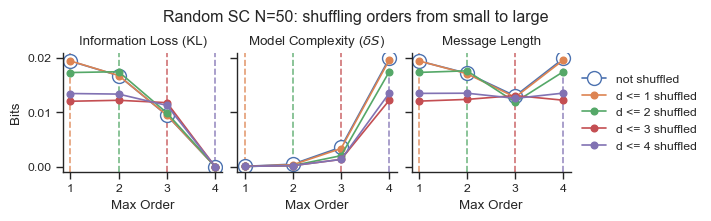

In [60]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(7, 2.1), constrained_layout=True, sharey=True)


#ax1.plot(orders, Ds_H, "o-", ms=7, mfc="w", lw=2)

ax1.plot(orders, Ds_H[0], "o-", label=f"not shuffled", ms=10, mfc="white")    
#ax1.axvline(d_shuffles[0], ls="--", c=f"C0", zorder=-2, alpha=0.8)
for j, H in enumerate(Hs):
    ax1.plot(orders, Ds_H[j+1], "o-", label=f"d={d_shuffles[j]} shuffled")
    ax1.axvline(d_shuffles[j], ls="--", c=f"C{j+1}", zorder=-2, alpha=0.8)

ax1.set_title("Information Loss (KL)")
ax1.set_xlabel("Max Order")
ax1.set_ylabel("Bits")

#ax2.plot(orders, lZs_H, "o-", ms=7, mfc="w", lw=2)

ax2.plot(orders, lZs_H[0], "o-", label=f"not shuffled", ms=10, mfc="white")    
#ax1.axvline(d_shuffles[0], ls="--", c=f"C0", zorder=-2, alpha=0.8)
for j, H in enumerate(Hs):
    ax2.plot(orders, lZs_H[j+1], "o-", label=f"d={d_shuffles[j]} shuffled")
    ax2.axvline(d_shuffles[j], ls="--", c=f"C{j+1}", zorder=-2, alpha=0.8)

ax2.set_title("Model Complexity ($\delta S$)")
ax2.set_xlabel("Max Order")

#ax3.plot(orders, Q, "o-", ms=7, mfc="w", lw=2)
ax3.plot(orders, Qs_H[0], "o-", label=f"not shuffled", ms=10, mfc="white")    
#ax1.axvline(d_shuffles[0], ls="--", c=f"C0", zorder=-2, alpha=0.8)
for j, H in enumerate(Hs):
    ax3.plot(orders, Qs_H[j+1], "o-", label=f"d <= {d_shuffles[j]} shuffled")
    ax3.axvline(d_shuffles[j], ls="--", c=f"C{j+1}", zorder=-2, alpha=0.8)

#y = np.where(Q == min(Q)) * np.ones(len(Q)) + 1
#x = np.linspace(np.min(Q), np.max(Q), len(Q))
#ax3.plot(y[0], x, c="r", lw=4, alpha=0.7, ls="--", zorder=-2)

ax3.legend(bbox_to_anchor=(1, 0.5), frameon=False, loc="center left")

ax3.set_title("Message Length")
ax3.set_xlabel("Max Order")

sb.despine()

fig.suptitle(f"Random SC N={N}: shuffling orders from small to large")

fig_name = f"message_length_RSC_N{N}_shuffling_ascending_orders" #lambda2_HG_SC_N_{N}_ps_{ps}_nrep_{n_repetitions}"

plt.savefig(f"{out_dir}{fig_name}.png", dpi=250, bbox_inches="tight")

<Axes: >

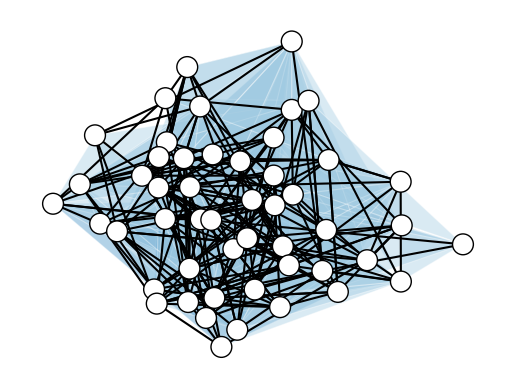

In [61]:
xgi.draw(Hs[-1])

In [ ]:
ax.plot(orders, Qs_H[0], "o-", label=f"not shuffled", ms=10, mfc="white")    
ax.axvline(d_shuffles[0], ls="--", c=f"C0", zorder=-2, alpha=0.8)

for j, H in enumerate(Hs):
    ax.plot(orders, Qs_H[j+1], "o-", label=f"d={d_shuffles[j]} shuffled")

    ax.axvline(d_shuffles[j], ls="--", c=f"C{j+1}", zorder=-2, alpha=0.8)

### Multiple taus

In [4]:
taus = [0.01, 0.1, 1]

Ds_H0, lZs_H0, orders = compute_information(H0, taus)

Ds_H = []
lZs_H = []

for i, H in enumerate(Hs):
    Ds_Hi, lZs_Hi, _ = compute_information(H, taus)
    Ds_H.append(Ds_Hi)
    lZs_H.append(lZs_Hi)

  0%|                                                           | 0/3 [00:00<?, ?it/s]

logm result may be inaccurate, approximate err = 8.016742853678119e-13
logm result may be inaccurate, approximate err = 8.016742853678119e-13
logm result may be inaccurate, approximate err = 4.350871144409221e-13
logm result may be inaccurate, approximate err = 8.016742853678119e-13
logm result may be inaccurate, approximate err = 5.737900525699966e-13
logm result may be inaccurate, approximate err = 8.016742853678119e-13
logm result may be inaccurate, approximate err = 6.203558125681481e-13
logm result may be inaccurate, approximate err = 8.016742853678119e-13
logm result may be inaccurate, approximate err = 6.773212233745527e-13
logm result may be inaccurate, approximate err = 8.016742853678119e-13
logm result may be inaccurate, approximate err = 6.777192526438904e-13
logm result may be inaccurate, approximate err = 8.016742853678119e-13
logm result may be inaccurate, approximate err = 6.646021326160591e-13
logm result may be inaccurate, approximate err = 8.016742853678119e-13
logm r

 33%|█████████████████                                  | 1/3 [00:32<01:04, 32.14s/it]

logm result may be inaccurate, approximate err = 8.016742853678119e-13
logm result may be inaccurate, approximate err = 5.545146344167048e-13
logm result may be inaccurate, approximate err = 5.545146344167048e-13
logm result may be inaccurate, approximate err = 3.3062057911895115e-13
logm result may be inaccurate, approximate err = 5.545146344167048e-13
logm result may be inaccurate, approximate err = 4.1746236265241017e-13
logm result may be inaccurate, approximate err = 5.545146344167048e-13
logm result may be inaccurate, approximate err = 4.810776025461899e-13
logm result may be inaccurate, approximate err = 5.545146344167048e-13
logm result may be inaccurate, approximate err = 4.616164791306845e-13
logm result may be inaccurate, approximate err = 5.545146344167048e-13
logm result may be inaccurate, approximate err = 5.193045376130101e-13
logm result may be inaccurate, approximate err = 5.545146344167048e-13
logm result may be inaccurate, approximate err = 5.485694258565133e-13
logm

 67%|██████████████████████████████████                 | 2/3 [01:13<00:37, 37.57s/it]

logm result may be inaccurate, approximate err = 5.545146344167048e-13


  0%|                                                           | 0/3 [00:00<?, ?it/s]

logm result may be inaccurate, approximate err = 6.755343319530016e-13
logm result may be inaccurate, approximate err = 6.755343319530016e-13
logm result may be inaccurate, approximate err = 4.350871144409221e-13
logm result may be inaccurate, approximate err = 6.755343319530016e-13
logm result may be inaccurate, approximate err = 5.564852645269207e-13
logm result may be inaccurate, approximate err = 6.755343319530016e-13
logm result may be inaccurate, approximate err = 6.081482829268497e-13
logm result may be inaccurate, approximate err = 6.755343319530016e-13
logm result may be inaccurate, approximate err = 7.494668897480793e-13
logm result may be inaccurate, approximate err = 6.755343319530016e-13
logm result may be inaccurate, approximate err = 6.80331195162655e-13
logm result may be inaccurate, approximate err = 6.755343319530016e-13
logm result may be inaccurate, approximate err = 6.12934194294414e-13
logm result may be inaccurate, approximate err = 6.733813046114849e-13
logm res

 33%|█████████████████                                  | 1/3 [00:32<01:04, 32.02s/it]

logm result may be inaccurate, approximate err = 6.755343319530016e-13
logm result may be inaccurate, approximate err = 5.2440390326132e-13
logm result may be inaccurate, approximate err = 5.2440390326132e-13
logm result may be inaccurate, approximate err = 3.3062057911895115e-13
logm result may be inaccurate, approximate err = 5.2440390326132e-13
logm result may be inaccurate, approximate err = 4.39765895469052e-13
logm result may be inaccurate, approximate err = 5.2440390326132e-13
logm result may be inaccurate, approximate err = 5.498993759400098e-13
logm result may be inaccurate, approximate err = 5.2440390326132e-13
logm result may be inaccurate, approximate err = 5.173522064043902e-13
logm result may be inaccurate, approximate err = 5.2440390326132e-13
logm result may be inaccurate, approximate err = 5.139959220314275e-13
logm result may be inaccurate, approximate err = 5.2440390326132e-13
logm result may be inaccurate, approximate err = 5.056209685820947e-13
logm result may be i

 67%|██████████████████████████████████                 | 2/3 [01:12<00:37, 37.17s/it]

logm result may be inaccurate, approximate err = 5.2440390326132e-13


  0%|                                                           | 0/3 [00:00<?, ?it/s]

logm result may be inaccurate, approximate err = 5.959372360557085e-13
logm result may be inaccurate, approximate err = 5.959372360557085e-13
logm result may be inaccurate, approximate err = 4.350871144409221e-13
logm result may be inaccurate, approximate err = 5.959372360557085e-13
logm result may be inaccurate, approximate err = 5.737900525699966e-13
logm result may be inaccurate, approximate err = 5.959372360557085e-13
logm result may be inaccurate, approximate err = 6.203558125681481e-13
logm result may be inaccurate, approximate err = 6.06707253999062e-13
logm result may be inaccurate, approximate err = 7.285039839544788e-13
logm result may be inaccurate, approximate err = 6.06707253999062e-13
logm result may be inaccurate, approximate err = 6.654771462082654e-13
logm result may be inaccurate, approximate err = 5.959372360557085e-13
logm result may be inaccurate, approximate err = 5.93464251332303e-13
logm result may be inaccurate, approximate err = 5.959372360557085e-13
logm resu

 33%|█████████████████                                  | 1/3 [00:31<01:03, 31.80s/it]

logm result may be inaccurate, approximate err = 5.959372360557085e-13
logm result may be inaccurate, approximate err = 4.526050651602394e-13
logm result may be inaccurate, approximate err = 4.523732150897055e-13
logm result may be inaccurate, approximate err = 3.3062057911895115e-13
logm result may be inaccurate, approximate err = 4.523732150897055e-13
logm result may be inaccurate, approximate err = 4.1746236265241017e-13
logm result may be inaccurate, approximate err = 4.523732150897055e-13
logm result may be inaccurate, approximate err = 4.810776025461899e-13
logm result may be inaccurate, approximate err = 4.523732150897055e-13
logm result may be inaccurate, approximate err = 5.598011680242306e-13
logm result may be inaccurate, approximate err = 4.523732150897055e-13
logm result may be inaccurate, approximate err = 5.290408948119364e-13
logm result may be inaccurate, approximate err = 4.523732150897055e-13
logm result may be inaccurate, approximate err = 5.467058460914497e-13
logm

 67%|██████████████████████████████████                 | 2/3 [01:12<00:36, 36.97s/it]

logm result may be inaccurate, approximate err = 4.523732150897055e-13


  0%|                                                           | 0/3 [00:00<?, ?it/s]

logm result may be inaccurate, approximate err = 8.111860267793886e-13
logm result may be inaccurate, approximate err = 8.111860267793886e-13
logm result may be inaccurate, approximate err = 4.350871144409221e-13
logm result may be inaccurate, approximate err = 8.111860267793886e-13
logm result may be inaccurate, approximate err = 5.737900525699966e-13
logm result may be inaccurate, approximate err = 8.111860267793886e-13
logm result may be inaccurate, approximate err = 6.203558125681481e-13
logm result may be inaccurate, approximate err = 8.111860267793886e-13
logm result may be inaccurate, approximate err = 6.773212233745527e-13
logm result may be inaccurate, approximate err = 8.111860267793886e-13
logm result may be inaccurate, approximate err = 6.777192526438904e-13
logm result may be inaccurate, approximate err = 8.111860267793886e-13
logm result may be inaccurate, approximate err = 6.465965546932534e-13
logm result may be inaccurate, approximate err = 8.111860267793886e-13
logm r

 33%|█████████████████                                  | 1/3 [00:34<01:09, 34.55s/it]

logm result may be inaccurate, approximate err = 8.072132206851038e-13
logm result may be inaccurate, approximate err = 6.497154082081749e-13
logm result may be inaccurate, approximate err = 6.497154082081749e-13
logm result may be inaccurate, approximate err = 3.3062057911895115e-13
logm result may be inaccurate, approximate err = 6.497154082081749e-13
logm result may be inaccurate, approximate err = 4.1746236265241017e-13
logm result may be inaccurate, approximate err = 6.497154082081749e-13
logm result may be inaccurate, approximate err = 4.810776025461899e-13
logm result may be inaccurate, approximate err = 6.497154082081749e-13
logm result may be inaccurate, approximate err = 4.951315226212706e-13
logm result may be inaccurate, approximate err = 6.497154082081749e-13
logm result may be inaccurate, approximate err = 5.193045376130101e-13
logm result may be inaccurate, approximate err = 6.497154082081749e-13
logm result may be inaccurate, approximate err = 4.818043931424125e-13
logm

 67%|██████████████████████████████████                 | 2/3 [01:15<00:38, 38.46s/it]

logm result may be inaccurate, approximate err = 6.497154082081749e-13


100%|███████████████████████████████████████████████████| 3/3 [01:58<00:00, 39.58s/it]


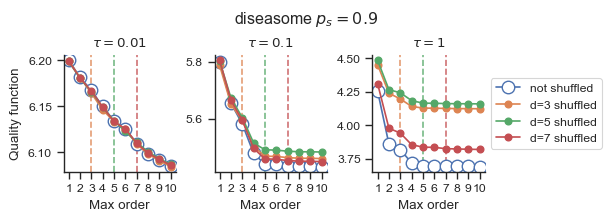

In [5]:
fig, axs = plt.subplots(
    1, len(taus), figsize=(2 * len(taus), 2.1), constrained_layout=True
)

for i, tau in enumerate(taus):

    axs[i].plot(orders, lZs_H0[i] - Ds_H0[i], "o-", label="not shuffled", ms=9, mfc="w")
    
    for j, H in enumerate(Hs):
        axs[i].plot(orders, lZs_H[j][i] - Ds_H[j][i], "o-", label=f"d={d_shuffles[j]} shuffled")
    
        axs[i].axvline(d_shuffles[j], ls="--", c=f"C{j+1}", zorder=-2, alpha=0.8)

    axs[i].set_title(rf"$\tau = {tau}$", weight="bold")
    axs[i].set_xlabel("Max order")
    axs[i].set_xticks(orders)

axs[0].set_ylabel("Quality function")
axs[-1].legend(loc="center left", bbox_to_anchor=(1, 0.5))

sb.despine()

fig.suptitle(f"{name} $p_s={p_shuffle}$")

fig_name = f"info_{name}_p_s_{p_shuffle}" #lambda2_HG_SC_N_{N}_ps_{ps}_nrep_{n_repetitions}"

#plt.savefig(f"{out_dir}{fig_name}.png", dpi=250, bbox_inches="tight")

In [6]:
H = xgi.Hypergraph([[1,2], [1,2,3,4]])

xgi.multiorder_laplacian(H, orders=[1,2,3], weights=[1,1,1])

/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/matrix.py:310: UserWarning: No edges of order 2. Contribution of that order is zero. Its weight is effectively zero.
  warn(


array([[ 5., -3., -1., -1.],
       [-3.,  5., -1., -1.],
       [-1., -1.,  3., -1.],
       [-1., -1., -1.,  3.]])

In [7]:
xgi.multiorder_laplacian(H, orders=[1,3], weights=[1,1])

array([[ 5., -3., -1., -1.],
       [-3.,  5., -1., -1.],
       [-1., -1.,  3., -1.],
       [-1., -1., -1.,  3.]])

### Compute entropy

In [8]:
ents = {}

for i, tau in enumerate(taus):
    
    ents[tau] = {}
    
    for j, HG in enumerate([H0] + Hs):        
        d_max = xgi.max_edge_order(HG)
        L_multi = np.zeros((HG.num_nodes, HG.num_nodes))
        for d in range(1, d_max+1):
            #K, Adj, L = su.compute_laplacians(G, d+1)
            L = xgi.laplacian(HG, d, rescale_per_node=False)
            L_multi += L
        
        ent = entropy(L_multi, tau)
        
        dd = 0 if j==0 else d_shuffles[j-1]
        ents[tau][dd] = ent
        
ents_df = pd.DataFrame.from_dict(ents)
        
ents_df_long = ents_df.stack().rename('entropy').to_frame().reset_index(names=["shuffle", "tau"])
ents_df

,0.01,0.10,1.00
0,6.244639+0.000000j,6.175864+0.000000j,5.349064+0.000000j
3,6.244702+0.000000j,6.170229+0.000000j,5.332210+0.000000j
5,6.244534+0.000000j,6.167961+0.000000j,5.365889+0.000000j
7,6.244618+0.000000j,6.172695+0.000000j,5.355570+0.000000j


/Users/maxime/.pyenv/versions/venv_xgi/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1369: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


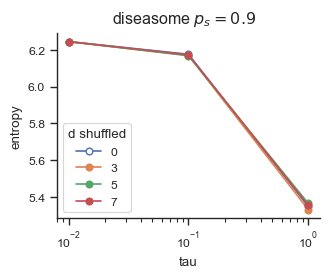

In [9]:
fig, ax  = plt.subplots(figsize=(3.4, 2.4))

for i, series in enumerate(ents_df.values):
    mfc = "w" if i==0 else None 
    ax.plot(ents_df.columns, series, "o-", label=ents_df.index[i], mfc=mfc)
    
ax.set_ylabel("entropy")
ax.set_xlabel("tau")
ax.legend(title="d shuffled")
ax.set_xscale("log", base=10)

sb.despine()

fig.suptitle(f"{name} $p_s={p_shuffle}$")

fig_name = f"info_{name}_p_s_{p_shuffle}_entropy" #lambda2_HG_SC_N_{N}_ps_{ps}_nrep_{n_repetitions}"
#plt.savefig(f"{fig_name}.png", dpi=250, bbox_inches="tight")